# Introduction

What is Statistical Inference?

Statistical inference is the process of extracting information of an unknown variable or an unknown model from available data. 
There are two main types, Bayesian and Classical.  

Inference problems are normally categorized into Parameter Estimation, Hypothesis testing, and Significance Testing. The methodologies discussed in the textbook are Maximum a posteriori probability rule, least mean squares estimation, maximum likelihood, regression, and likelihood ratio tests.

### Probability vs. Statistics

Recall probability is defined by axioms, so we must assume a probabilistic model follows the axioms.  We can then use methods to extract information, and have a set, unique correct answer.  This differs from Statistics, since in Stats, there are many different methods to extract different answers, and there is no best method.  Choosing a method is described as an art, and considerations depend on factors such as performance guarantees, past experience, "common sense," and the consensus of the statistics community. 

### Bayesian versus Classical Statistics

__Bayesian:__
- Models are treated as random variables with known distributions.
- Fits statistical methods into probability theory axioms, so each question has unique answer
    - How is this done?

A bayesian model introduces a random variable $\theta$, that represents the model, and postulates a __prior__ probability distribution $p_\theta(\theta)$. The following model, the __posterior__ probability distribution captures all the information that $x$ can provide about $\theta$

<center>$p_{\theta|x}(\theta|x)$

__Classical:__
- Models are treated as deterministic quantities, which happen to be unknown.
    

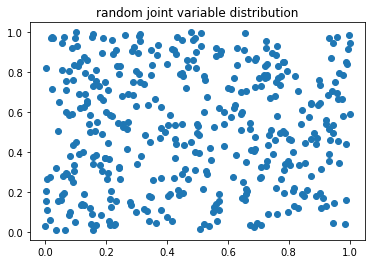

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(400)
y = np.random.rand(400)

plt.scatter(x, y)
plt.title("random joint variable distribution")

plt.show()

In [4]:
%%timeit
big_array = [0] * pow(10, 6)
for index, elem in enumerate(big_array):
    big_array[index] = elem + 1

print(big_array[0:6])

[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1,